In [ ]:
from fastai.tabular.all import *
from math import log

In [ ]:
datafile = Path('./data.csv')

## build data.csv with Python

In [ ]:
datafile.unlink()

In [ ]:
if not datafile.exists():
    print(f"making {datafile}")
    data = ((x,x) for x in range(1, 25000+1))
    df = pd.DataFrame(data, columns = ['x', 'y'])
    df.to_csv(datafile, index=False)

making data.csv


## check the docs

In [ ]:
doc(tabular_learner)  # note the link to the online docs

## setup

In [ ]:
df = pd.read_csv('./data.csv') # csv containing x,y with rows 0,0 through 25000,25000

In [ ]:
df['y'] = df['y'].map(lambda y: log(y))

In [ ]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))
to = TabularPandas(df, procs=[Categorify, FillMissing, Normalize],
                   cont_names = ['x'],
                   y_names='y',
                   splits=splits)
dls = to.dataloaders()
learn = tabular_learner(dls, lr=0.3, metrics=rmse)

## learning rate finder

SuggestedLRs(valley=0.3630780577659607)

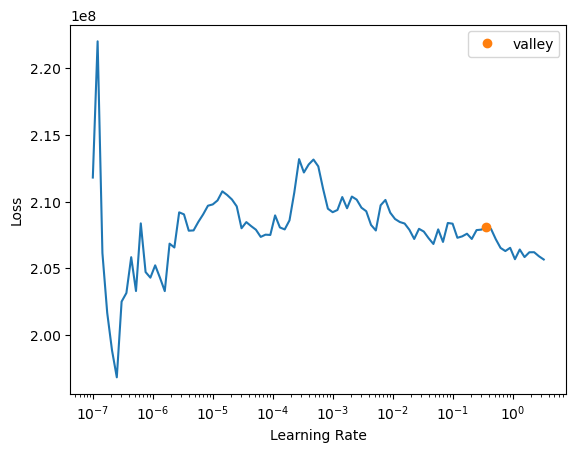

In [ ]:
learn.lr_find()

## learning

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,_rmse,time
0,120188064.000000,78198784.000000,8843.007812,00:00
1,8248697.000000,3841838.000000,1960.060791,00:00
2,1869628.375000,919220.437500,958.759888,00:00
3,1303207.250000,156359.265625,395.422913,00:00


In [ ]:
learn.lr = 0.03

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,_rmse,time
0,120188064.000000,78198784.000000,8843.007812,00:00
1,8248697.000000,3841838.000000,1960.060791,00:00
2,1869628.375000,919220.437500,958.759888,00:00
3,1303207.250000,156359.265625,395.422913,00:00


## see if it works

In [ ]:
for i in [0, 100, 3000, 10000, 19000, 25000]:
    row, clas, probs = learn.predict(df.iloc[i])
    row.show()

,x,y
0,-0.000274,-34.336334


,x,y
0,99.999758,63.156036


,x,y
0,2999.999817,2890.428955


,x,y
0,10000.000101,9714.879883


,x,y
0,19000.000159,18489.175781


,x,y
0,24999.999911,24338.705078


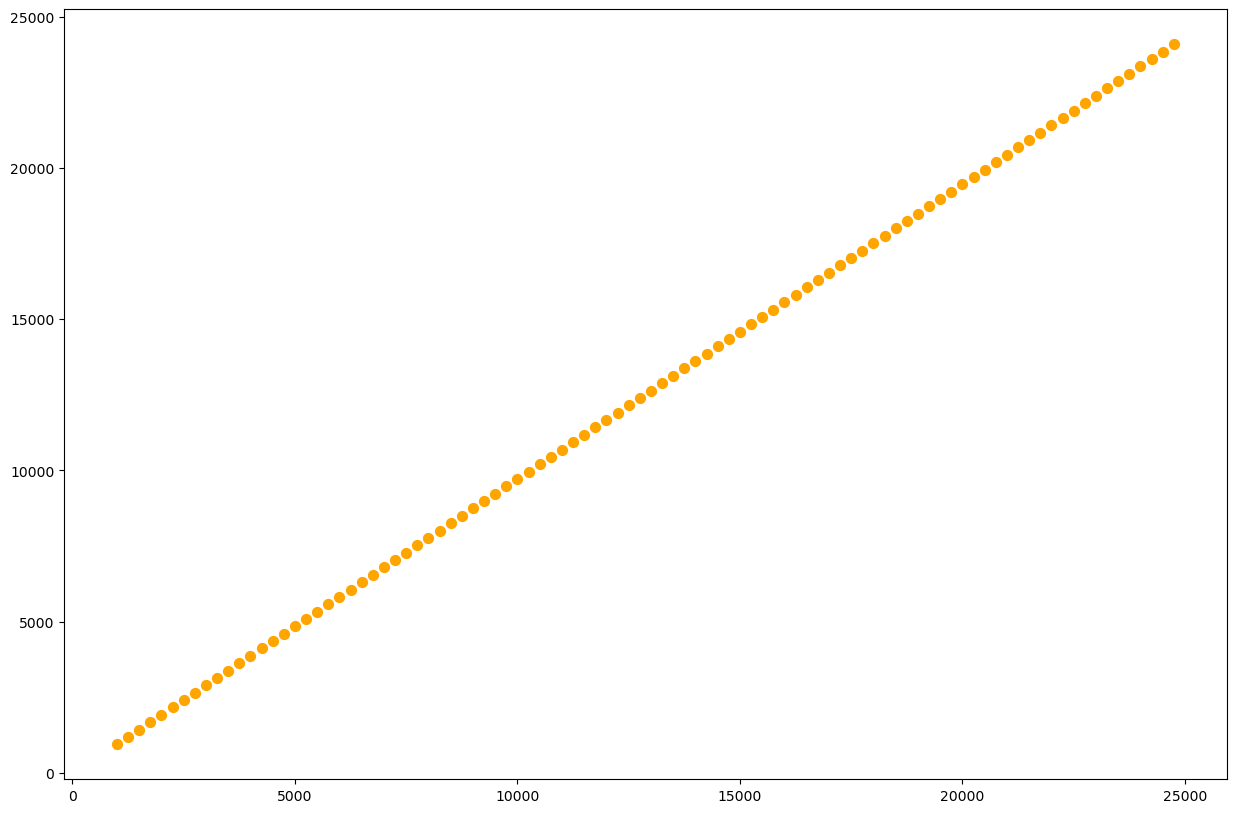

In [ ]:
plt.figure(figsize = (15,10))
for i in range(1000,25000,250):
    row, _, _ = learn.predict(df.iloc[i].drop('y'))
    plt.scatter(i, row['y'], s = 50, c='orange')

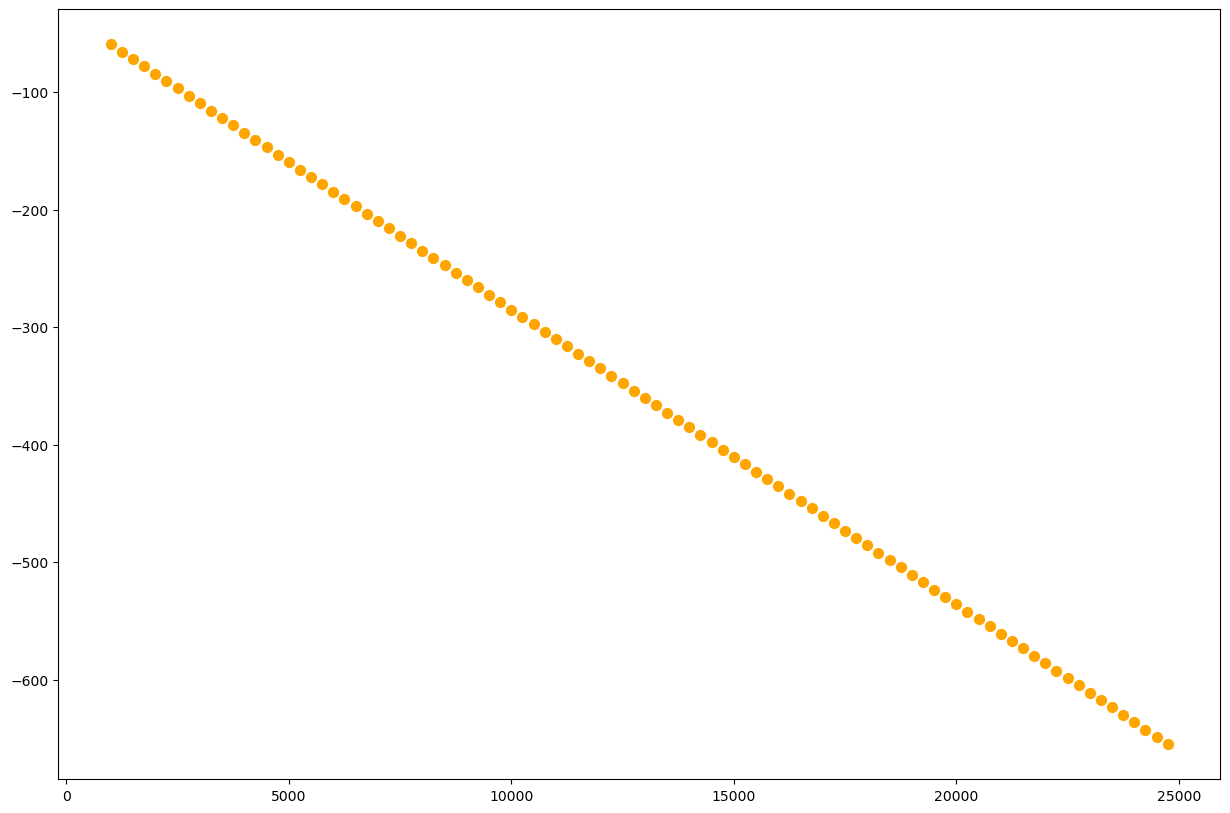

In [ ]:
plt.figure(figsize = (15,10))
for i in range(1000,25000,250):
    row, _, _ = learn.predict(df.iloc[i].drop('y'))
    plt.scatter(i, row['y']-i, s = 50, c='orange')

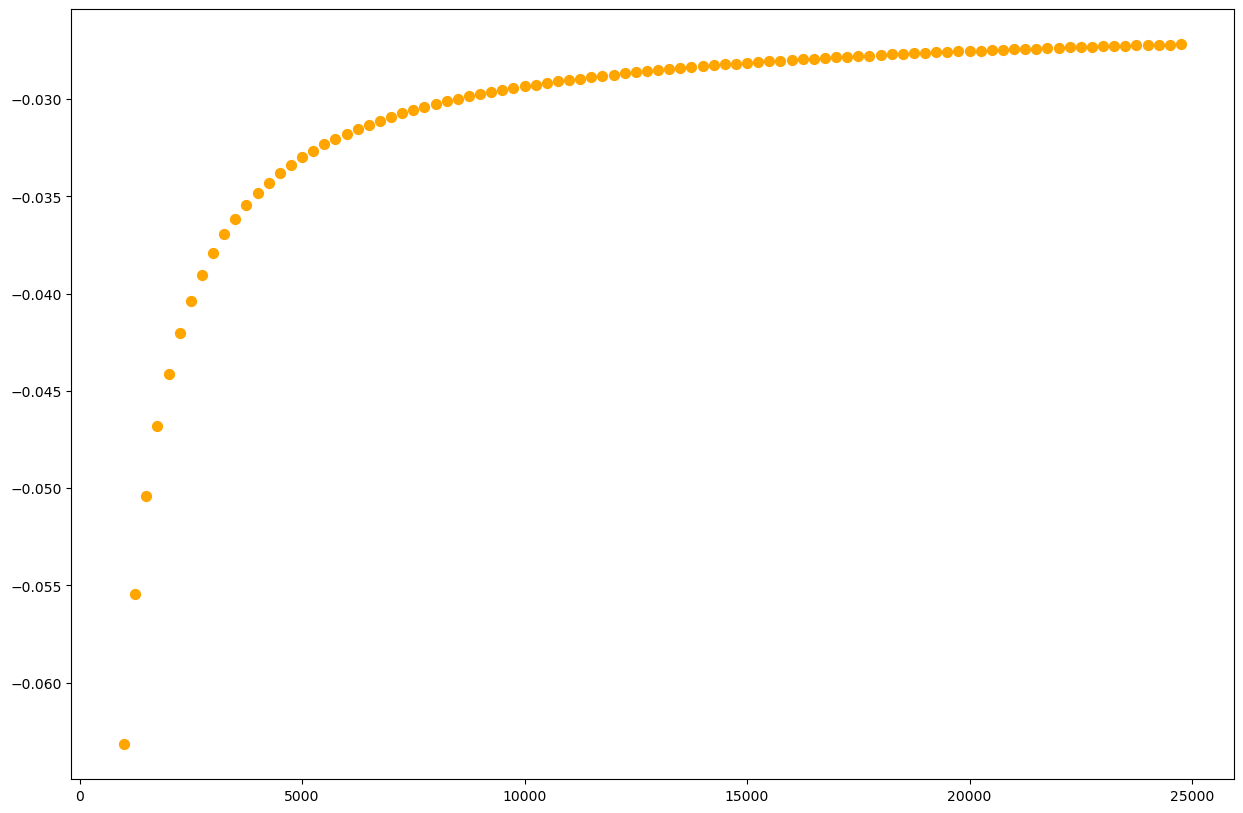

In [ ]:
plt.figure(figsize = (15,10))
for i in range(1000,25000,250):
    row, _, _ = learn.predict(df.iloc[i].drop('y'))
    plt.scatter(i, (row['y'] - i)/row['y'], s = 50, c='orange')

## scratch

In [ ]:
learn.model.layers

Sequential(
  (0): LinBnDrop(
    (0): Linear(in_features=1, out_features=1, bias=True)
  )
)

In [ ]:
learn1 = tabular_learner(dls, lr=0.3, layers=[1], metrics=rmse)

del learn1.model.layers[0]

learn1.model.layers

Sequential(
  (0): LinBnDrop(
    (0): Linear(in_features=1, out_features=1, bias=True)
  )
)

In [ ]:
learn2 = tabular_learner(dls, lr=0.3, layers = [50, 50, 50, 50], metrics=rmse)
learn2.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=1, out_features=50, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=50, out_features=50, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=50, out_features=50, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): LinBnDrop(
      (0): Linear(in_features=50, out_features=50, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=

<matplotlib.collections.PathCollection>

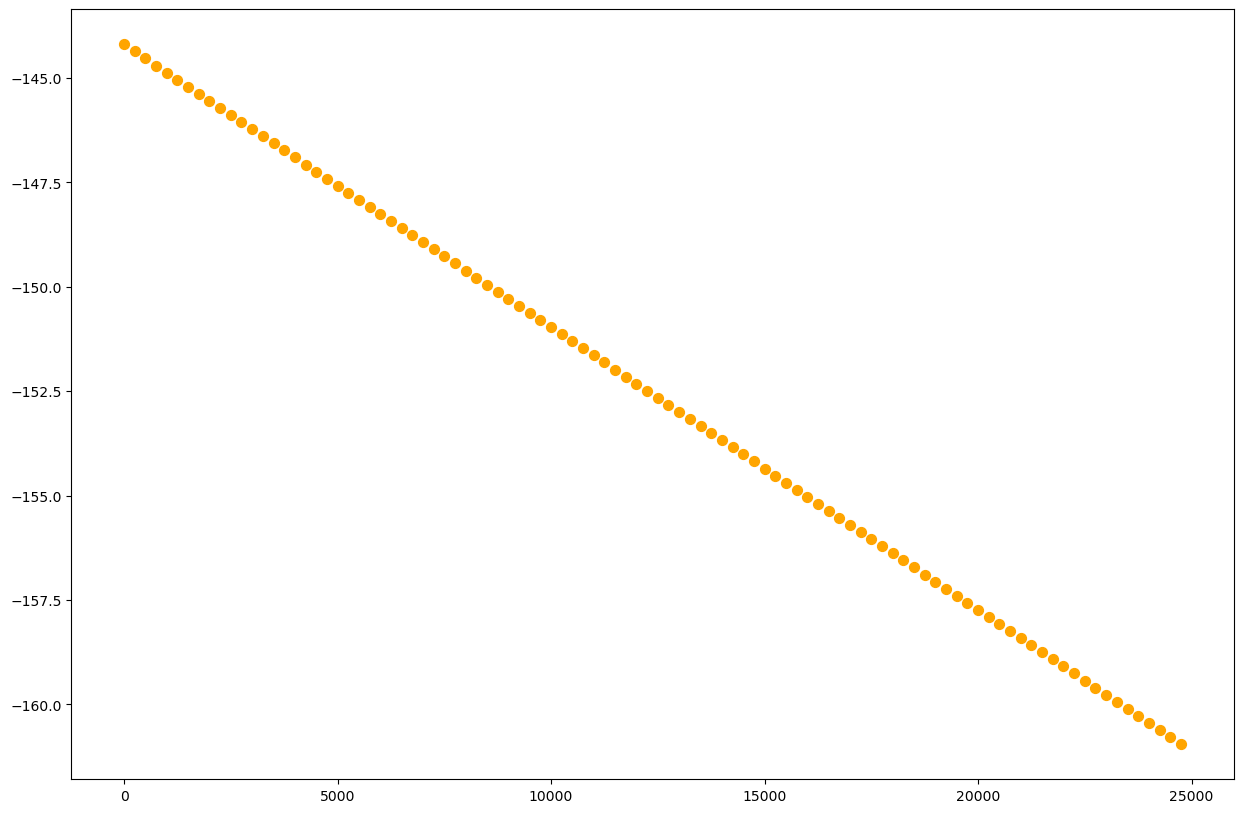

In [ ]:
plt.figure(figsize = (15,10))
xs = []
errors = []
for i in range(0, 25000, 250):
    inp = df.iloc[i]
    x = inp['x']
    y = inp['y']
    row, _, _ = learn.predict(inp.drop('y'))
    pred = row['y']
    xs.append(x)
    errors.append(pred - y)
plt.scatter(xs, errors, s = 50, c='orange')